In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy

In [62]:
df_raw = pd.read_csv('../data/raw_combined.csv')
print(df_raw.shape)
print()
print(df_raw.info())
print()
df_raw.head()

(6163, 37)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6163 entries, 0 to 6162
Data columns (total 37 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   year                                                    6163 non-null   int64  
 1   unit_id                                                 6163 non-null   int64  
 2   institution_name                                        6163 non-null   object 
 3   state_abbr                                              6163 non-null   object 
 4   bea_region                                              6163 non-null   int64  
 5   highest_level                                           6163 non-null   int64  
 6   is_degree_offering                                      6163 non-null   int64  
 7   is_hbcu                                                 6163 non-null   int64  
 8   is_tribal_institution     

,year,unit_id,institution_name,state_abbr,bea_region,highest_level,is_degree_offering,is_hbcu,is_tribal_institution,geographic_status,...,enrollment_only_distance_education,enrollment_some_but_not_exclusively_distance_education,enrollment_no_distance_education,enrollment_dual_credit,fte_estimated_undergrad,fte_estimated_grad,fte_reported_undergrad,fte_reported_grad,fte_reported_doctor_professional_practice,completions_number_students
0,2023,100654,Alabama A & M University,AL,5,9,1,1,2,12,...,29511,345843,135432,0,626805,70875,626805,70875,0,98415
1,2023,100663,University of Alabama at Birmingham,AL,5,9,1,2,2,12,...,482841,964872,318816,15390,1600020,954585,1600020,954585,194940,858060
2,2023,100690,Amridge University,AL,5,9,1,2,2,12,...,47587,0,0,115,24035,31280,24035,31280,0,19665
3,2023,100706,University of Alabama in Huntsville,AL,5,9,1,2,2,12,...,96741,501579,186057,15255,859005,168345,859005,168345,8370,308880
4,2023,100724,Alabama State University,AL,5,9,1,1,2,12,...,17498,210938,87490,390,432510,59670,434850,59670,10010,77740


In [63]:
df_raw.describe()

,year,unit_id,bea_region,highest_level,is_degree_offering,is_hbcu,is_tribal_institution,geographic_status,is_active_current_year,institutional_category,...,enrollment_only_distance_education,enrollment_some_but_not_exclusively_distance_education,enrollment_no_distance_education,enrollment_dual_credit,fte_estimated_undergrad,fte_estimated_grad,fte_reported_undergrad,fte_reported_grad,fte_reported_doctor_professional_practice,completions_number_students
count,6163.0,6163.000000,6163.000000,6163.000000,6163.000000,6163.00000,6163.000000,6163.000000,6163.000000,6163.000000,...,6.163000e+03,6.163000e+03,6.163000e+03,6.163000e+03,6.163000e+03,6.163000e+03,6.163000e+03,6.163000e+03,6163.000000,6.163000e+03
mean,2023.0,286616.707123,4.655525,4.819731,1.302612,1.98345,1.994321,19.874087,1.033750,3.583482,...,8.361487e+04,1.029107e+05,1.023487e+05,4.261117e+04,2.446667e+05,4.561711e+04,2.447662e+05,4.614788e+04,9242.481097,8.886692e+04
std,0.0,140281.510571,2.197180,2.777323,0.552447,0.12759,0.075151,9.829596,0.257626,1.995117,...,4.255461e+05,2.814887e+05,2.557794e+05,1.627011e+05,6.527042e+05,2.022927e+05,6.526442e+05,2.041799e+05,46675.557426,2.474431e+05
min,2023.0,100654.000000,0.000000,-3.000000,-3.000000,1.00000,1.000000,-3.000000,1.000000,-2.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,2023.0,169460.500000,3.000000,2.000000,1.000000,2.00000,2.000000,12.000000,1.000000,2.000000,...,0.000000e+00,0.000000e+00,3.501000e+03,0.000000e+00,4.140000e+03,0.000000e+00,4.140000e+03,0.000000e+00,0.000000,2.376000e+03
50%,2023.0,220598.000000,5.000000,4.000000,1.000000,2.00000,2.000000,21.000000,1.000000,4.000000,...,8.100000e+01,3.312000e+03,1.733400e+04,0.000000e+00,2.662800e+04,0.000000e+00,2.672000e+04,0.000000e+00,0.000000,1.205200e+04
75%,2023.0,447966.500000,6.000000,7.000000,2.000000,2.00000,2.000000,22.000000,1.000000,6.000000,...,4.990950e+04,7.813800e+04,8.888900e+04,1.762650e+04,1.955040e+05,3.919500e+03,1.953600e+05,3.919500e+03,0.000000,6.720000e+04
max,2023.0,499723.000000,9.000000,9.000000,2.000000,2.00000,2.000000,43.000000,3.000000,6.000000,...,1.882534e+07,4.699080e+06,7.536168e+06,7.712256e+06,1.488578e+07,4.739175e+06,1.488578e+07,4.739175e+06,775305.000000,4.717710e+06


In [64]:
df_raw.isnull().sum().sort_values(ascending=False)

number_programs_offered                                   4022
cip_code_second_largest_program                           4022
cip_code_third_largest_program                            4022
cip_code_fourth_largest_program                           4022
cip_code_fifth_largest_program                            4022
cip_code_sixth_largest_program                            4022
cip_code_largest_program                                  4022
control_affiliation                                        114
open_admission_policy                                      114
enrollment_dual_credit                                       0
enrollment_no_distance_education                             0
enrollment_some_but_not_exclusively_distance_education       0
fte_estimated_undergrad                                      0
enrollment_for_credit                                        0
enrollment                                                   0
fte_estimated_grad                                     

In [65]:

df_raw.drop(
    columns=[
        'number_programs_offered'
        , 'cip_code_largest_program'
        , 'cip_code_second_largest_program'
        , 'cip_code_third_largest_program'
        , 'cip_code_fourth_largest_program'
        , 'cip_code_fifth_largest_program'
        , 'cip_code_sixth_largest_program'
    ]
    , inplace=True
)

df_raw.dropna(subset=[
    'control_affiliation'
    , 'open_admission_policy'
    ], inplace=True
)

df_raw['control_affiliation'] = df_raw['control_affiliation'].astype(int)
df_raw['open_admission_policy'] = df_raw['open_admission_policy'].astype(int)

print(df_raw.shape)
df_raw.isnull().sum().sum()


(6049, 30)


np.int64(0)

In [66]:
df_raw.head()

,year,unit_id,institution_name,state_abbr,bea_region,highest_level,is_degree_offering,is_hbcu,is_tribal_institution,geographic_status,...,enrollment_only_distance_education,enrollment_some_but_not_exclusively_distance_education,enrollment_no_distance_education,enrollment_dual_credit,fte_estimated_undergrad,fte_estimated_grad,fte_reported_undergrad,fte_reported_grad,fte_reported_doctor_professional_practice,completions_number_students
0,2023,100654,Alabama A & M University,AL,5,9,1,1,2,12,...,29511,345843,135432,0,626805,70875,626805,70875,0,98415
1,2023,100663,University of Alabama at Birmingham,AL,5,9,1,2,2,12,...,482841,964872,318816,15390,1600020,954585,1600020,954585,194940,858060
2,2023,100690,Amridge University,AL,5,9,1,2,2,12,...,47587,0,0,115,24035,31280,24035,31280,0,19665
3,2023,100706,University of Alabama in Huntsville,AL,5,9,1,2,2,12,...,96741,501579,186057,15255,859005,168345,859005,168345,8370,308880
4,2023,100724,Alabama State University,AL,5,9,1,1,2,12,...,17498,210938,87490,390,432510,59670,434850,59670,10010,77740


In [67]:
for col in df_raw.drop(columns=[
    'unit_id'
    , 'institution_name'
    , 'enrollment'
    , 'enrollment_for_credit'
    , 'enrollment_only_distance_education'
    , 'enrollment_some_but_not_exclusively_distance_education'
    , 'enrollment_no_distance_education'
    , 'enrollment_dual_credit'
    , 'fte_estimated_undergrad'
    , 'fte_estimated_grad'
    , 'fte_reported_undergrad'
    , 'fte_reported_grad'
    , 'fte_reported_doctor_professional_practice'
    , 'completions_number_students'
]):
    print(f'{col}: {np.sort(df_raw[col].unique()).tolist()}\n')

year: [2023]

state_abbr: ['AK', 'AL', 'AR', 'AS', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'FM', 'GA', 'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MH', 'MI', 'MN', 'MO', 'MP', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'PW', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI', 'WV', 'WY']

bea_region: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

highest_level: [1, 2, 3, 4, 5, 6, 7, 8, 9]

is_degree_offering: [1, 2]

is_hbcu: [1, 2]

is_tribal_institution: [1, 2]

geographic_status: [-3, 11, 12, 13, 21, 22, 23, 31, 32, 33, 41, 42, 43]

date_closed: ['-2', '00/00/0000', '03/30/2023', '03/31/2024', '04/19/2024', '04/22/2023', '05/30/2023', '05/31/2022', '06/30/2023', '08/15/2023', '08/28/2023', '09/08/2023', '09/15/2023', '09/29/2023', '09/30/2023', '10/13/2023', '10/20/2023', '10/25/2023', '11/01/2022', '12/09/2023']

is_active_current_year: [1, 3]

institutional_category: [-2, -1, 1, 2, 3, 4, 5, 6]

carnegie_c

## Notes for categorical features

Mappings from dictionaries combined with feedback from previous code block and inspections below. Visual scans of the data in the downloaded files were not as clear as expected, so we do an explicit check here before loading values back into the database.

- year: good
- state_abbr: good (could load an abbreviation-to-full name table in db)
- bea_region:
    - 0: US Service schools
    - 1: New England CT ME MA NH RI VT
    - 2: Mid East DE DC MD NJ NY PA
    - 3: Great Lakes IL IN MI OH WI
    - 4: Plains IA KS MN MO NE ND SD
    - 5: Southeast AL AR FL GA KY LA MS NC SC TN VA WV
    - 6: Southwest AZ NM OK TX
    - 7: Rocky Mountains CO ID MT UT WY
    - 8: Far West AK CA HI NV OR WA
    - 9: Outlying areas AS FM GU MH MP PR PW VI
    - -3: Not available
- highest_level:
    - 0: Other
    - 1: Postsecondary award, certificate or diploma of less than one academic year
    - 2: Postsecondary award, certificate or diploma of at least one but less than two academic years
    - 3: Associate's degree
    - 4: Postsecondary award, certificate or diploma of at least two but less than four academic years
    - 5: Bachelor's degree
    - 6: Postbaccalaureate certificate
    - 7: Master's degree
    - 8: Post-master's certificate
    - 9: Doctor's degree
    - b: None of the above or no answer
    - -2: Not applicable, first-professional only
    - -3: Not Available
- is_degree_offering:
    - 1: yes
    - 2: no
- is_hbcu:
    - 1: yes
    - 2: no
- is_tribal_institution:
    - 1: yes
    - 2: no
- geographic_status:
    - -3: null
    - 11: City: Large: Territory inside an urbanized area and inside a principal city with population of 250,000 or more.
    - 12: City: Midsize: Territory inside an urbanized area and inside a principal city with population less than 250,000 and greater than or equal to 100,000.
    - 13: City: Small: Territory inside an urbanized area and inside a principal city with population less than 100,000.
    - 21: Suburb: Large: Territory outside a principal city and inside an urbanized area with population of 250,000 or more.
    - 22: Suburb: Midsize: Territory outside a principal city and inside an urbanized area with population less than 250,000 and greater than or equal to 100,000.
    - 23: Suburb: Small: Territory outside a principal city and inside an urbanized area with population less than 100,000.
    - 31: Town: Fringe: Territory inside an urban cluster that is less than or equal to 10 miles from an urbanized area.
    - 32: Town: Distant: Territory inside an urban cluster that is more than 10 miles and less than or equal to 35 miles from an urbanized area.
    - 33: Town: Remote: Territory inside an urban cluster that is more than 35 miles of an urbanized area.
    - 41: Rural: Fringe: Census-defined rural territory that is less than or equal to 5 miles from an urbanized area, as well as rural territory that is less than or equal to 2.5 miles from an urban cluster.
    - 42: Rural: Distant: Census-defined rural territory that is more than 5 miles but less than or equal to 25 miles from an urbanized area, as well as rural territory that is more than 2.5 miles but less than or equal to 10 miles from an urban cluster.
    - 43: Rural: Remote: Census-defined rural territory that is more than 25 miles from an urbanized area and is also more than 10 miles from an urban cluster.
- date_closed: -2 for null
- is_active_current_year:
    - 1: yes
    - 3: no
- institutional_category:
    - -2: null
    - -1: null
    - 1: Degree-granting, graduate with no undergraduate degrees - These institutions offer a Master's degree, Doctor's degree  or a First-professional degree and do not offer a Bachelor's degree or an Associate's degree.
    - 2: Degree-granting, primarily baccalaureate or above - These institutions offer a Bachelor's degree, Master's degree,Doctor's degree or a First-professional degree.  Also, the total number of degrees/certificates at or above the bachelor's level awarded divided by the total number of degrees/certificates awarded is greater than 50 percent.
    - 3: Degree-granting, not primarily baccalaureate or above - These institutions offer a Bachelor's degree, Master's degree, Doctor's degree,or a First-professional degree.  Also, the total number of degrees/certificates at or above the bachelor's level awarded divided by the total number of degrees/certificates awarded must be less than or equal to 50 percent.
    - 4: Degree-granting, Associate's and certificates - Institutions offer an Associate's degree and may offer other postsecondary certificates, awards or diplomas of less than one academic year; at least one but less-than two academic years; at least two but less-than four academic years. This category also includes institutions that offer a postbaccalaureate certificate, Post-master's certificate or a First-professional certificate and the highest degree offered is an Associate's degree.
    - 5: Nondegree-granting, above the baccalaureate - Institutions do not offer Associate's, Bachelor's, Master's, Doctor's or First-professional degrees, but offer either Postbaccaulaureate, Post-master's or First-professional certificates.
    - 6: Nondegree-granting, sub-baccalaureate - Institutions do not offer Associate's, Bachelor's , Master's, Doctor's, or First-professional degrees, or certificates above the baccalaureate level. They do offer postsecondary certificates, awards or diplomas of less than one academic year; at least one but less than two academic years; or at least two but less than four academic years.
- carnegie_classification: can't find a clear mapping between integer values and classification categories, so we will leave this one out for now
- institution_size_category: same issue as previous feature
- core_based_statistical_area:
    - -2: null
    - Remaining 5-digit values are identifiers. OMB 2020 CBSA has a map for these if we end up wanting clearer labels.
- control_affiliation:
    - 1: Public
    - 2: Private for-profit
    - 3: Private not-for-profit independent (no religious affiliation)
    - 4: Private not-for-profit religious affiliation - Specify
- open_admission_policy: not sure, so we can drop this feature
    - -2: null
    - 1:
    - 2:

## Summary

We will create a sort-of dimensional model with a star schema but just fitting for the dataset we have at this stage. In a production environment, we would need to model IPEDS data in any number of ways, so we would need a more comprehensive design phase for the dimensional model, data marts, or whatever other design approach we chose to use. For example, we will leave the institution name in the fact table to save on busy work for the scope of this project.

We will make some premature assumptions here such as combining different types of null-ish categories into one in order to simplify moving forward with the data for now. This is an area we would want to sink a lot more time into in a production system.

- year: we will leave this as is without a separate dimension table; with better dimensional modeling, we would be able to combine different time dimensions into a shared dimension table
- Leave state abbreviations as they are now, though adding a translation table in production would be a good idea
- bea_region: make -3 null and add dimension table
- highest_level: combine null-ish categories and add dimension table
- geographic_status: make -3 null and add dimension table
- date_closed: make -2 null; note that we will not provide a more robust dimension table for dates since we are unlikely to use this field in later modeling, though we would likely want a date dimension in a production environment
- institutional_category: combine -2 and -1 into null and add dimension table
- core_based_statistical_area: make -2 null; this is one we would want a dimension table for, but it is not important for the current project to add a full dimension table
- control_affiliation: add dimension table

Binary fields as y/n (in that order)
- is_degree_offering: 1/2
- is_hbcu: 1/2
- is_tribal_institution: 1/2
- is_active_current_year: 1/3

Some fields are complex enough at the moment that we can drop them, though some fields, such as Carnegie classification, are useful in terms of higher education meaning.

- Drop carnegie_classification
- Drop institution_size_category
- Drop open_admission_policy


## Categorical Visuals

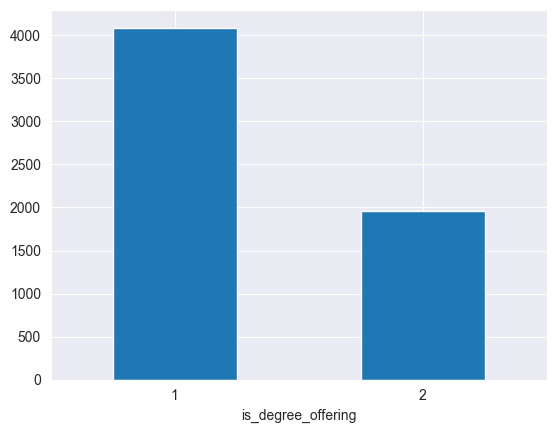

In [68]:

df_raw['is_degree_offering'].value_counts().plot(
    kind='bar'
    , rot=0
);

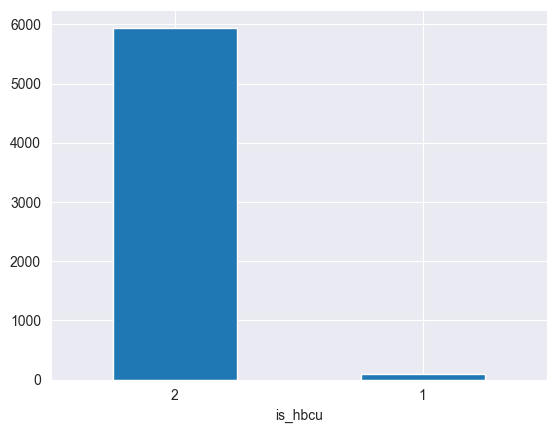

In [69]:

df_raw['is_hbcu'].value_counts().plot(
    kind='bar'
    , rot=0
);


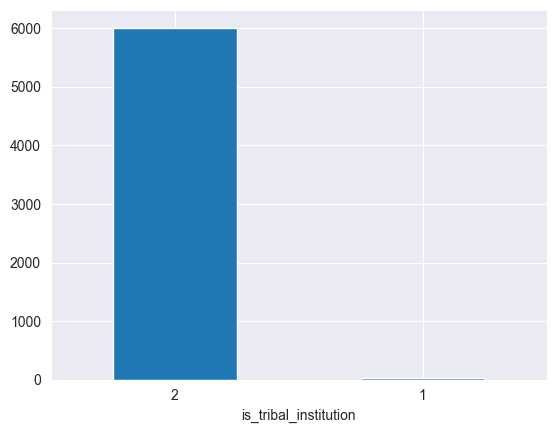

In [70]:

df_raw['is_tribal_institution'].value_counts().plot(
    kind='bar'
    , rot=0
);


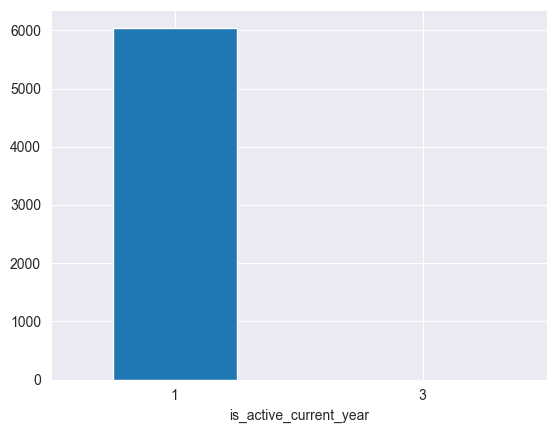

In [71]:

df_raw['is_active_current_year'].value_counts().plot(
    kind='bar'
    , rot=0
);


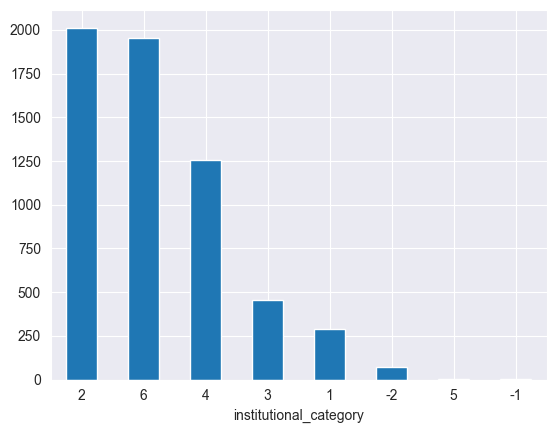

In [72]:
df_raw['institutional_category'].value_counts().plot(
    kind='bar'
    , rot=0
);


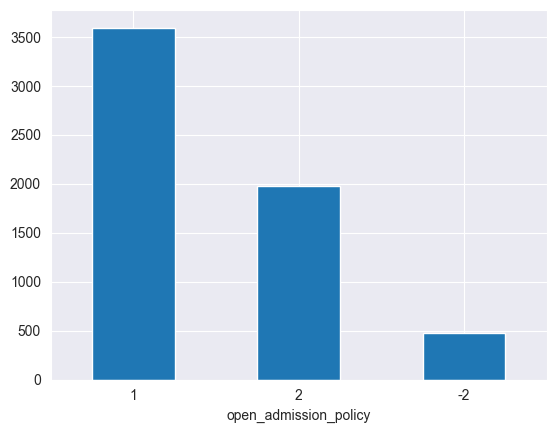

In [73]:

df_raw['open_admission_policy'].value_counts().plot(
    kind='bar'
    , rot=0
);


## Notes for numeric features

We will note here if any of the numeric features require extra preprocessing.

- enrollment
- enrollment_for_credit
- enrollment_only_distance_education
- enrollment_some_but_not_exclusively_distance_education
- enrollment_no_distance_education
- enrollment_dual_credit
- fte_estimated_undergrad
- fte_estimated_grad
- fte_reported_undergrad
- fte_reported_grad
- fte_reported_doctor_professional_practice
- completions_number_students

These all look good for now. For later modeling, we will likely trim this down probably just to enrollment and completions_number_students to keep the scope down, but there are a number of interesting questions we can ask just with these set of measures.

We see a general right skew to all of these. This may result in problems when we experiment with generative modeling. If that is the case, then we may look at setting a cutoff threshold above which we drop institutions, but we can revisit that later if needed.

We will treat each of these as part of one fact row in a star schema. Similarly to above, this is dimensional-ish modeling, but it should work for this pass of this project, though we would want to separate out types of measures such as enrollment vs fte vs completions into separate fact tables in a larger production system.

## Numeric Visuals

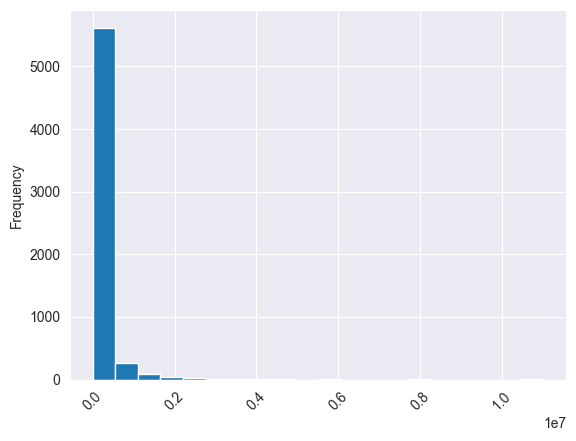

In [74]:
df_raw['enrollment'].plot(
    kind='hist'
    , bins=20
    , rot=45
);

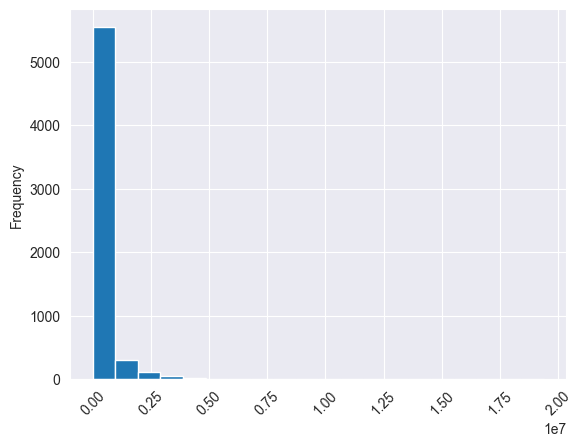

In [75]:

df_raw['enrollment_for_credit'].plot(
    kind='hist'
    , bins=20
    , rot=45
);


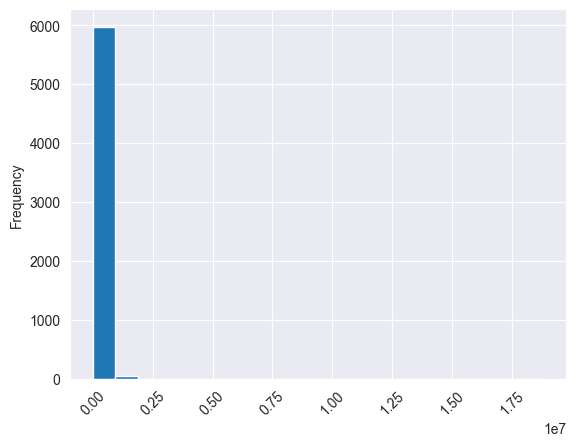

In [76]:

df_raw['enrollment_only_distance_education'].plot(
    kind='hist'
    , bins=20
    , rot=45
);


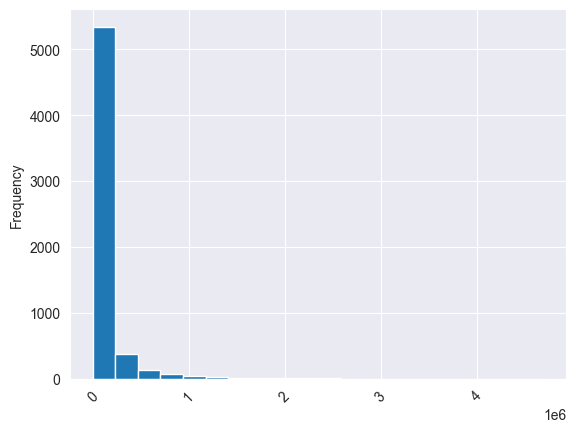

In [77]:

df_raw['enrollment_some_but_not_exclusively_distance_education'].plot(
    kind='hist'
    , bins=20
    , rot=45
);


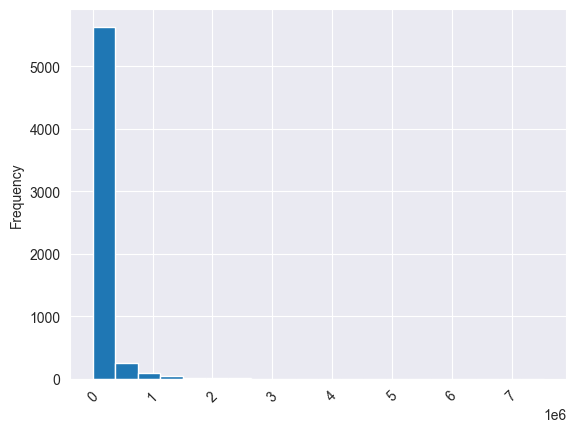

In [78]:

df_raw['enrollment_no_distance_education'].plot(
    kind='hist'
    , bins=20
    , rot=45
);


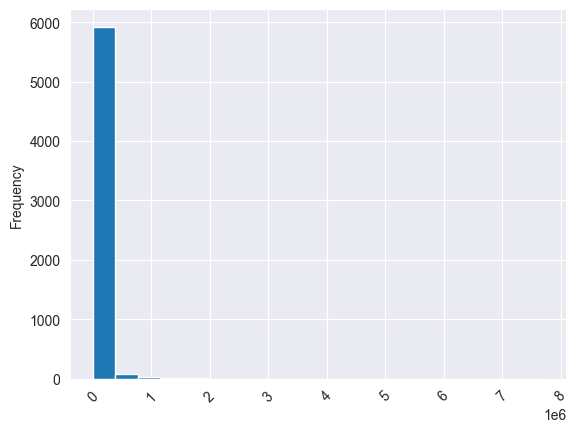

In [79]:

df_raw['enrollment_dual_credit'].plot(
    kind='hist'
    , bins=20
    , rot=45
);


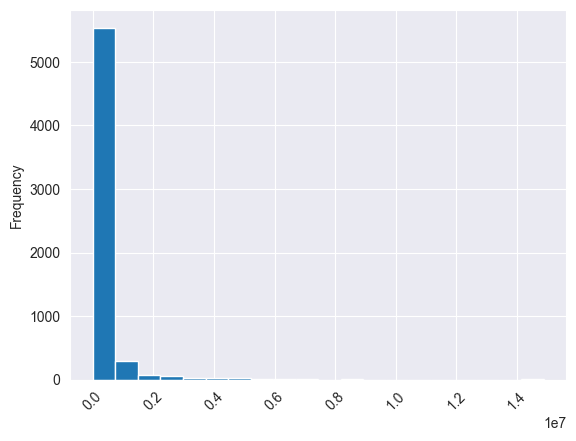

In [80]:

df_raw['fte_estimated_undergrad'].plot(
    kind='hist'
    , bins=20
    , rot=45
);


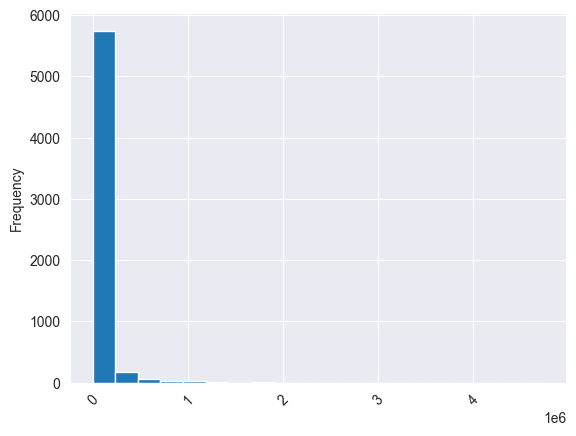

In [81]:

df_raw['fte_estimated_grad'].plot(
    kind='hist'
    , bins=20
    , rot=45
);


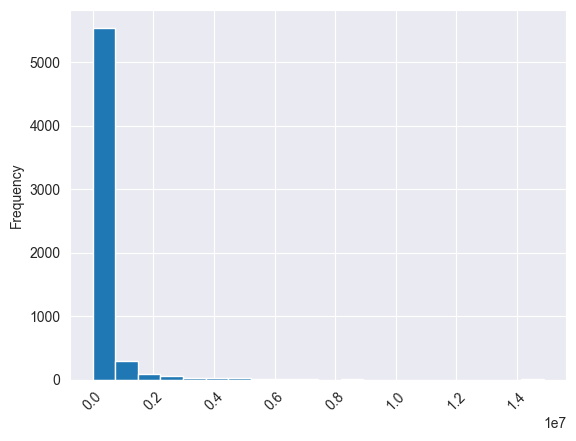

In [82]:

df_raw['fte_reported_undergrad'].plot(
    kind='hist'
    , bins=20
    , rot=45
);



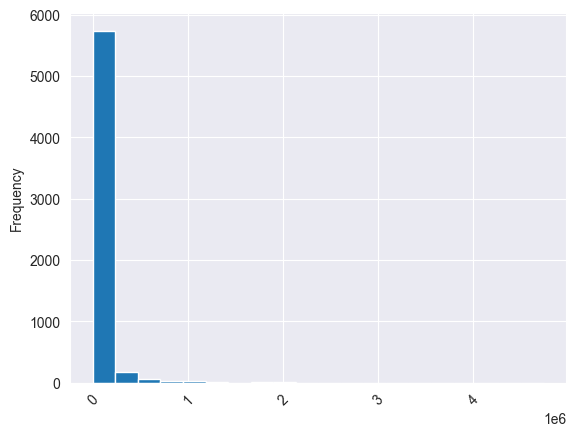

In [83]:

df_raw['fte_reported_grad'].plot(
    kind='hist'
    , bins=20
    , rot=45
);


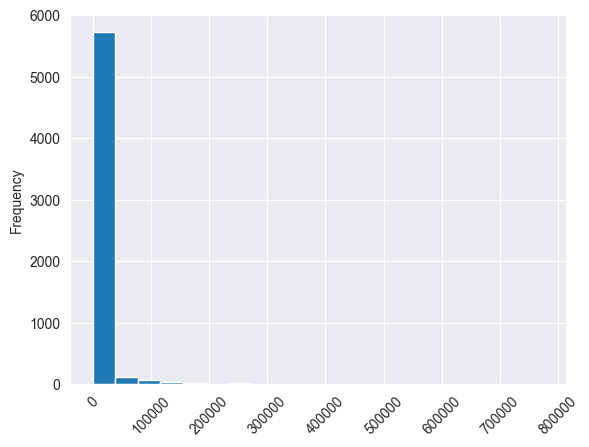

In [84]:
df_raw['fte_reported_doctor_professional_practice'].plot(
    kind='hist'
    , bins=20
    , rot=45
);


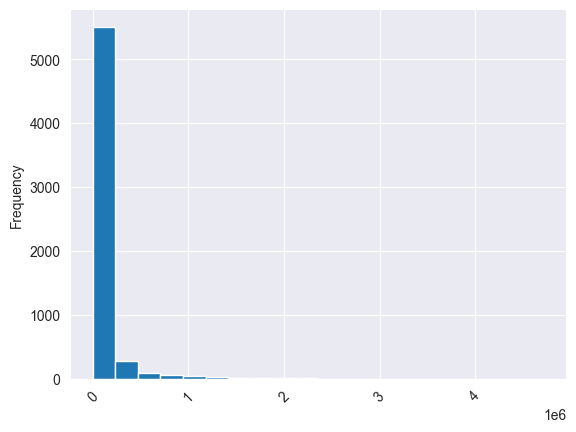

In [85]:
df_raw['completions_number_students'].plot(
    kind='hist'
    , bins=20
    , rot=45
);


## Overall Summary

The next step is to return to the database to simulate a warehousing layer. We are going to use a dimensional-ish model with a star schema. This is close enough for our purposes for now, and it is easy to modify and build upon if we decide to pivot this to a production system with a lot more IPEDS data.

There are notes in the categorical features summary section about some extra steps we'll need to take in the warehouse. Please see the associated scripts for what is going on there.